## Standard (Fully Connected) Neural Network
This code demonstrates use of fully connected networks, for the problem of handwritten digit classification. The dataset used is called MNIST. This notebook is a slightly modified version of the notebook provided at https://github.com/husnainfareed/MNIST-Handwritten-Digit-Recognition 


#### Loading Required packages and Data

In [1]:
###1. Load Data and Splot Data
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
X_train.shape # wow, 60k testdaten!
np.unique(Y_test) # 10 unterschiedliche werte; klar .. 0..9
print(X_train.shape)
np.shape(Y_test)

(60000, 28, 28)


(10000,)

#### Preprocessing

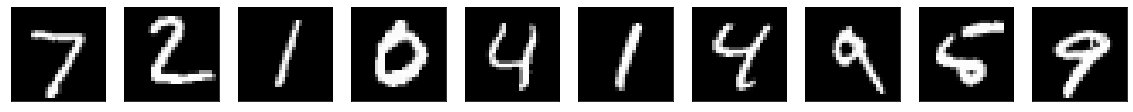

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [4]:
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)
New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


#### Setting up parameters

In [10]:
input_size = 784
batch_size = 200   
# two hidden layers
hidden1 = 800 # before 400
hidden2 = 400 # before 20
hidden3 = 200 # before 20
#hidden4 = 100 # before 20
# output layers? 10, weil 10 klassen

#### Building the FCN Model

In [11]:
###4.Build the model
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(hidden3, activation='relu'))
#model.add(Dense(hidden4, activation='softmax'))
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adam') # optimizer to adam
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_6 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 1,030,610
Trainable params: 1,030,610
Non-trainable params: 0
_________________________________________________________________


#### Training The Model

In [12]:
# Fitting on Data
# epoch is: wenn das neural network einmal den gesamten datensatz gesehen hat
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=10, verbose=2)

Epoch 1/10
 - 9s - loss: 0.2313 - acc: 0.9322
Epoch 2/10
 - 10s - loss: 0.0785 - acc: 0.9757
Epoch 3/10
 - 10s - loss: 0.0508 - acc: 0.9838
Epoch 4/10
 - 10s - loss: 0.0369 - acc: 0.9881
Epoch 5/10
 - 10s - loss: 0.0279 - acc: 0.9908
Epoch 6/10
 - 11s - loss: 0.0230 - acc: 0.9924
Epoch 7/10
 - 10s - loss: 0.0207 - acc: 0.9931
Epoch 8/10
 - 10s - loss: 0.0164 - acc: 0.9943
Epoch 9/10
 - 10s - loss: 0.0158 - acc: 0.9950
Epoch 10/10
 - 10s - loss: 0.0152 - acc: 0.9953


KeyError: 'val_acc'

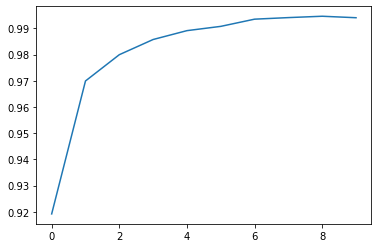

In [8]:
# Print the stuff
import matplotlib.pyplot as plt
#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

#plt.plot(history.history['acc']),color = 'red')
#plt.plot(history.history['val_acc']),color = 'blue')

#### Testing The Model

10000/10000 [==============================] - 1s 74us/step

Test accuracy: 0.9812
[0 6 9 0 1 5 9 7 3 4]


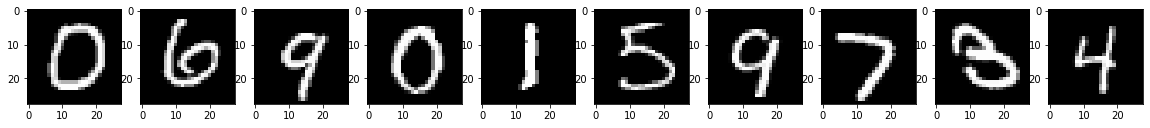

In [9]:
###5.Test 
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(10,20)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()
plt.close()